In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0)

In [2]:
gpu_data = pd.read_csv('gpu.csv', index_col=0)

(0.0033, 0.0036)

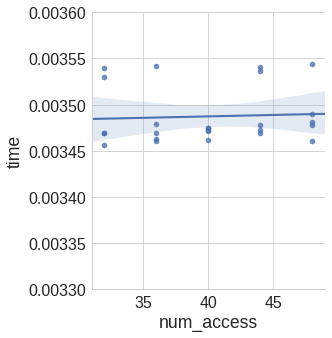

In [3]:
lm = sns.lmplot('num_access', 'time', gpu_data)
lm.axes[0, 0].set_ylim(3.3e-3, 3.6e-3)

In [4]:
result = sm.ols(formula="time ~ num_access", data=gpu_data).fit()
result.params

Intercept     3.474781e-03
num_access    3.107050e-07
dtype: float64

### Conclusion
Each l2 access takes 360 cycle. Close to what we have concluded for DRAM access.

In [5]:
sim_data = pd.read_csv('sim.csv', index_col=0)

In [6]:
full_data = gpu_data.append(sim_data, ignore_index=True)

(0.0033, 0.008)

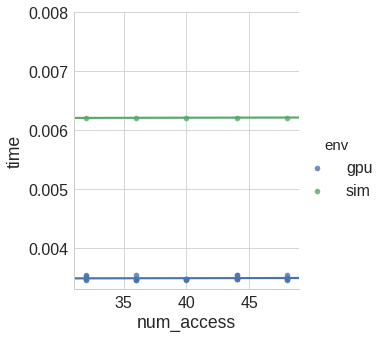

In [9]:
lm3 = sns.lmplot('num_access', 'time', full_data, hue='env')
lm3.axes[0, 0].set_ylim(3.3e-3, 8e-3)

### Best configuration

DRAM latency 300
L2 latency 100 + 3(dir lookup)
L1 Latency 1
